## 1. Importing modules

In [61]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import pickle

## 2. Loading data

In [2]:
df = pd.read_csv('Life Expectancy Data.csv')
pd.set_option('display.max_columns',50)

In [4]:
df.head()

Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing              65.0            263.0   
1  Afghanistan  2014  Developing              59.9            271.0   
2  Afghanistan  2013  Developing              59.9            268.0   
3  Afghanistan  2012  Developing              59.5            272.0   
4  Afghanistan  2011  Developing              59.2            275.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   \
0             62     0.01               71.279624         65.0      1154   
1             64     0.01               73.523582         62.0       492   
2             66     0.01               73.219243         64.0       430   
3             69     0.01               78.184215         67.0      2787   
4             71     0.01                7.097109         68.0      3013   

    BMI   under-five deaths   Polio  Total expenditure  Diphtheria   \
0   19.1                  83    6.0               8.16         65.0   
1   18.6                  86   58.0               8.18         62.0   
2   18.1                  89   62.0               8.13         64.0   
3   17.6                  93   67.0               8.52         67.0   
4   17.2                  97   68.0               7.87         68.0   

    HIV/AIDS         GDP  Population   thinness  1-19 years  \
0        0.1  584.259210  33736494.0                   17.2   
1        0.1  612.696514    327582.0                   17.5   
2        0.1  631.744976  31731688.0                   17.7   
3        0.1  669.959000   3696958.0                   17.9   
4        0.1   63.537231   2978599.0                   18.2   

    thinness 5-9 years  Income composition of resources  Schooling  
0                 17.3                            0.479       10.1  
1                 17.5                            0.476       10.0  
2                 17.7                            0.470        9.9  
3                 18.0                            0.463        9.8  
4                 18.2                            0.454        9.5

## 3. Understanding Data

In [5]:
df.describe()

Year  Life expectancy   Adult Mortality  infant deaths  \
count  2938.000000       2928.000000      2928.000000    2938.000000   
mean   2007.518720         69.224932       164.796448      30.303948   
std       4.613841          9.523867       124.292079     117.926501   
min    2000.000000         36.300000         1.000000       0.000000   
25%    2004.000000         63.100000        74.000000       0.000000   
50%    2008.000000         72.100000       144.000000       3.000000   
75%    2012.000000         75.700000       228.000000      22.000000   
max    2015.000000         89.000000       723.000000    1800.000000   

           Alcohol  percentage expenditure  Hepatitis B       Measles   \
count  2744.000000             2938.000000  2385.000000    2938.000000   
mean      4.602861              738.251295    80.940461    2419.592240   
std       4.052413             1987.914858    25.070016   11467.272489   
min       0.010000                0.000000     1.000000       0.000000   
25%       0.877500                4.685343    77.000000       0.000000   
50%       3.755000               64.912906    92.000000      17.000000   
75%       7.702500              441.534144    97.000000     360.250000   
max      17.870000            19479.911610    99.000000  212183.000000   

              BMI   under-five deaths         Polio  Total expenditure  \
count  2904.000000         2938.000000  2919.000000         2712.00000   
mean     38.321247           42.035739    82.550188            5.93819   
std      20.044034          160.445548    23.428046            2.49832   
min       1.000000            0.000000     3.000000            0.37000   
25%      19.300000            0.000000    78.000000            4.26000   
50%      43.500000            4.000000    93.000000            5.75500   
75%      56.200000           28.000000    97.000000            7.49250   
max      87.300000         2500.000000    99.000000           17.60000   

       Diphtheria      HIV/AIDS            GDP    Population  \
count  2919.000000  2938.000000    2490.000000  2.286000e+03   
mean     82.324084     1.742103    7483.158469  1.275338e+07   
std      23.716912     5.077785   14270.169342  6.101210e+07   
min       2.000000     0.100000       1.681350  3.400000e+01   
25%      78.000000     0.100000     463.935626  1.957932e+05   
50%      93.000000     0.100000    1766.947595  1.386542e+06   
75%      97.000000     0.800000    5910.806335  7.420359e+06   
max      99.000000    50.600000  119172.741800  1.293859e+09   

        thinness  1-19 years   thinness 5-9 years  \
count            2904.000000          2904.000000   
mean                4.839704             4.870317   
std                 4.420195             4.508882   
min                 0.100000             0.100000   
25%                 1.600000             1.500000   
50%                 3.300000             3.300000   
75%                 7.200000             7.200000   
max                27.700000            28.600000   

       Income composition of resources    Schooling  
count                      2771.000000  2775.000000  
mean                          0.627551    11.992793  
std                           0.210904     3.358920  
min                           0.000000     0.000000  
25%                           0.493000    10.100000  
50%                           0.677000    12.300000  
75%                           0.779000    14.300000  
max                           0.948000    20.700000

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [7]:
df.isna().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [8]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

## 4. Data preprocessing

In [9]:
## removing extra spaces from column names
df = df.rename(columns = lambda x:x.strip())

In [10]:
cat_col = [f for f in df.columns if type(df[str(f)][0]) == str]
cat_col

['Country', 'Status']

In [11]:
num_col = [f for f in df.columns if type(df[str(f)][0]) != str]
num_col

['Year',
 'Life expectancy',
 'Adult Mortality',
 'infant deaths',
 'Alcohol',
 'percentage expenditure',
 'Hepatitis B',
 'Measles',
 'BMI',
 'under-five deaths',
 'Polio',
 'Total expenditure',
 'Diphtheria',
 'HIV/AIDS',
 'GDP',
 'Population',
 'thinness  1-19 years',
 'thinness 5-9 years',
 'Income composition of resources',
 'Schooling']

In [12]:
for i in cat_col:
    print('Number of categories in {} are {}'.format(i,len(df[i].unique())))

Number of categories in Country are 193
Number of categories in Status are 2


In [13]:
df['Status'].unique()

array(['Developing', 'Developed'], dtype=object)

In [14]:
df['Status'] = np.where(df['Status']=='Developing',1,0)

In [15]:
df['Status'].unique()

array([1, 0])

## Dividing into train and test set 

In [16]:
X=df.drop(columns=['Country','Life expectancy'])
X.shape

(2938, 20)

In [17]:
y=df['Life expectancy']
y.shape

(2938,)

In [18]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [19]:
X_train.shape

(2350, 20)

In [20]:
X_test.shape

(588, 20)

# On train set

In [21]:
## Removing nan values
## Since mean is affected by outliers we will replace our nan values by median
for i in X_train.columns:
    X_train[i].fillna(X_train[i].median(),inplace=True)

F:\anaconda\lib\site-packages\pandas\core\series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [22]:
X_train.isna().sum()

Year                               0
Status                             0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
BMI                                0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
thinness  1-19 years               0
thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
dtype: int64

In [23]:
y_train.fillna(y_train.median(),inplace=True)

In [24]:
y_train.isna().sum()

0

### EDA

F:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Life expectancy'>

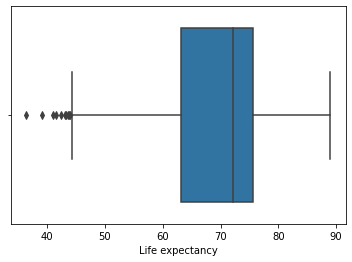

In [25]:
sns.boxplot(df['Life expectancy'])

F:\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Life expectancy', ylabel='Density'>

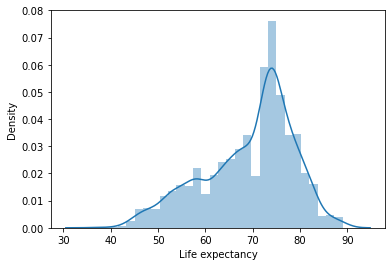

In [26]:
sns.distplot(df['Life expectancy'])

#### The y variable is having very few outliers and is almost linearly distributed so we can use linear regression

<AxesSubplot:>

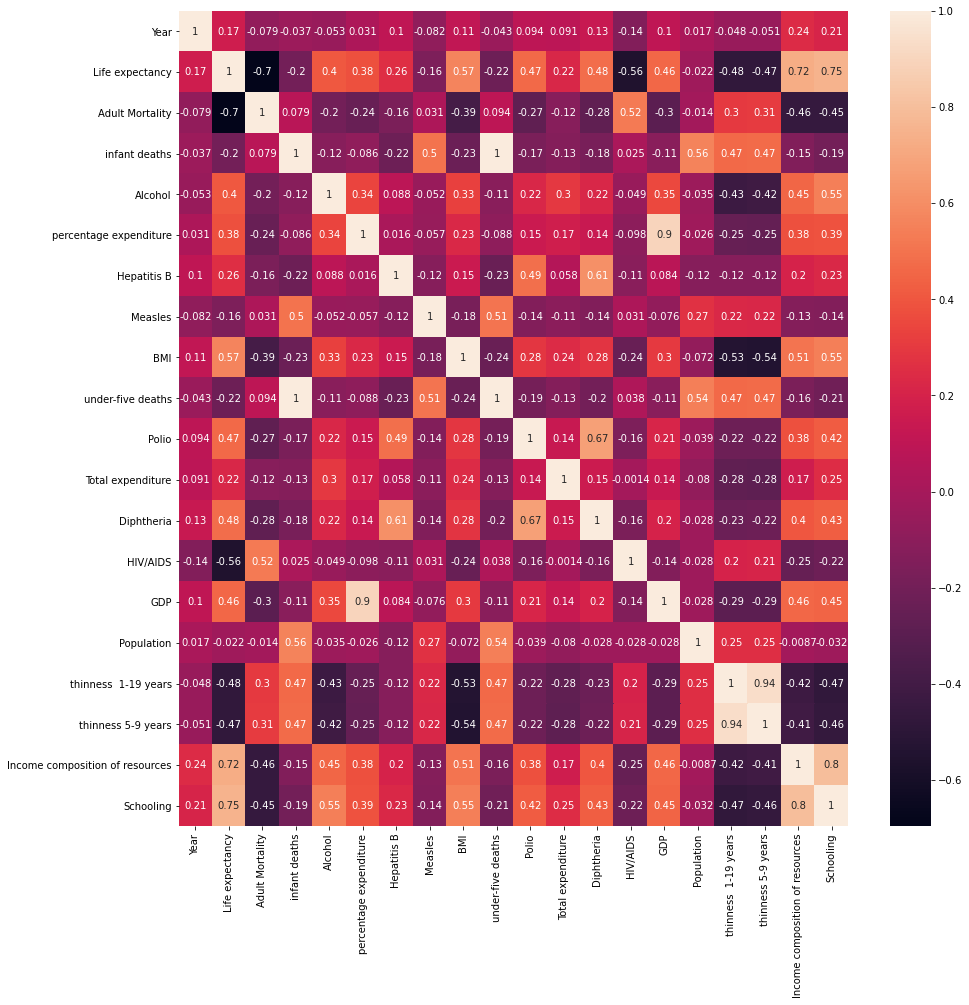

In [111]:
plt.figure(figsize=(15,15))
sns.heatmap(df[num_col].corr(),annot=True)

#### few features have very high correlation thus while building model we can use either one of them

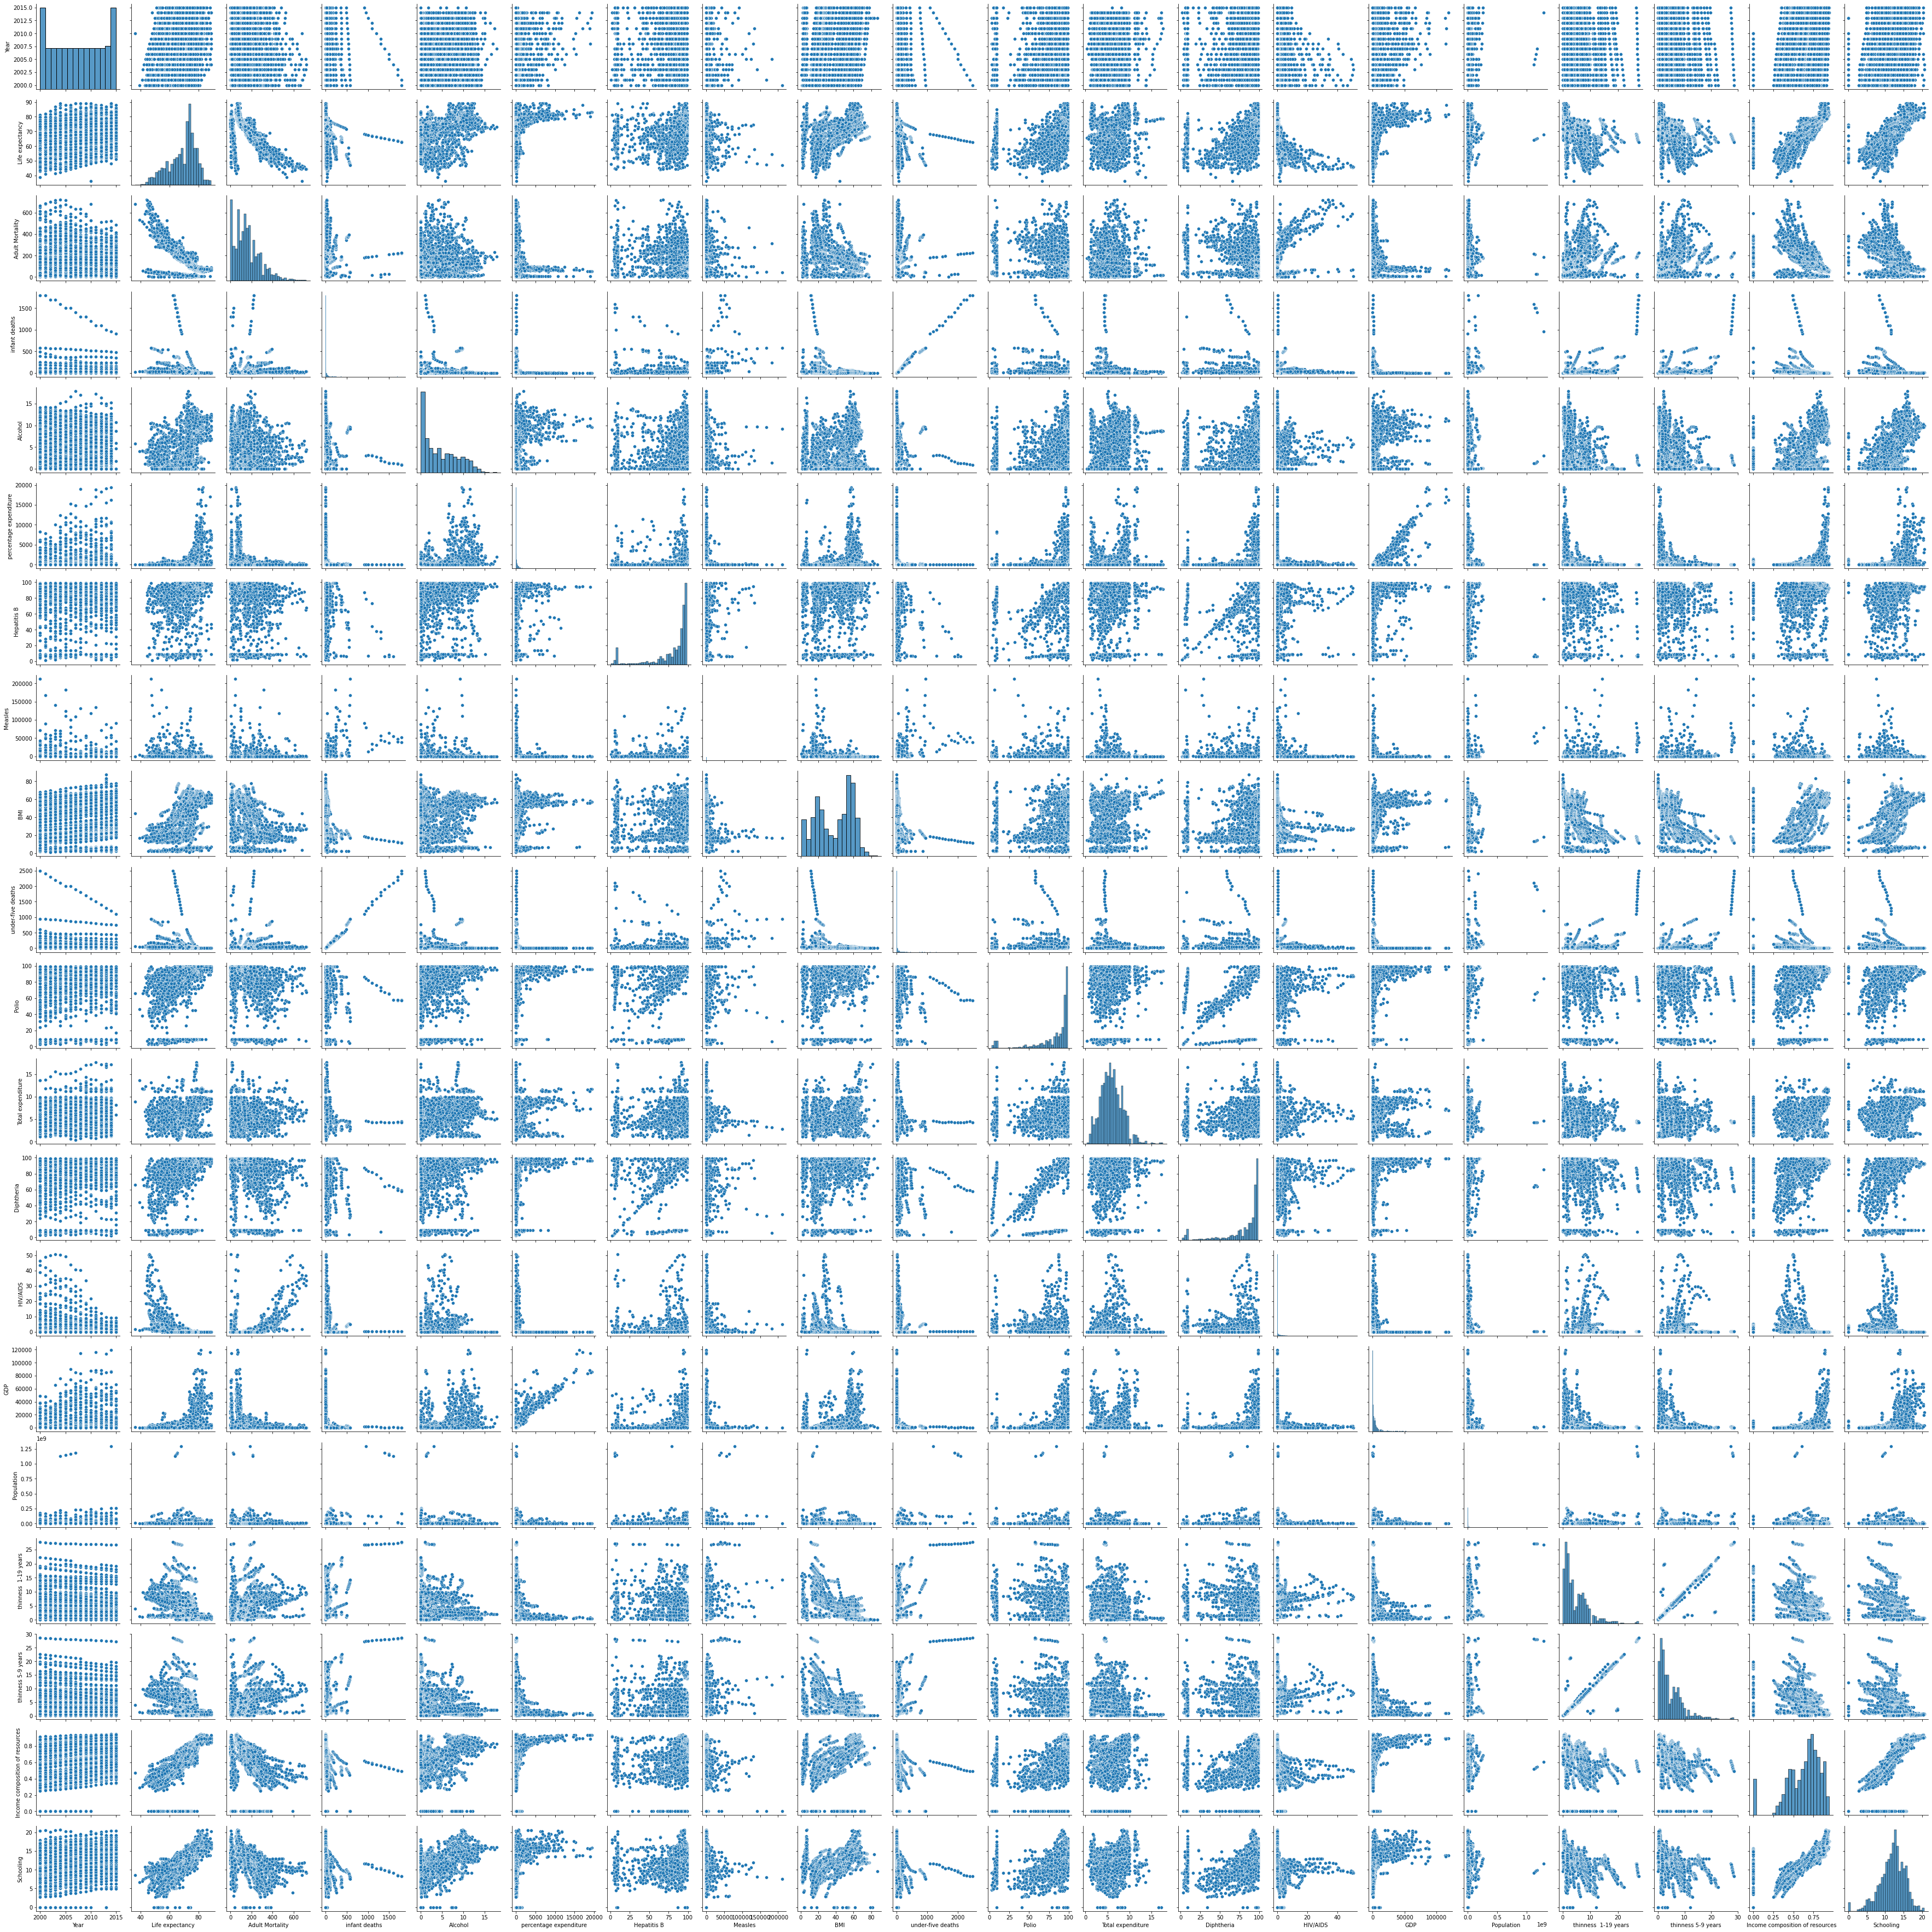

In [95]:
sns.pairplot(df[num_col])

#### Few features have linear relatonship with y variable so linear regression can be used 

In [27]:
##Lets remove outliers from training set
def remove_outliers(data1,j):
    data=data1.copy()
    IQR = data[j].quantile(0.75)-data[j].quantile(0.25)
    lower = data[j].quantile(0.75) - 1.5*IQR
    upper = data[j].quantile(0.75) + 1.5*IQR
    data.loc[data[j]>upper,j]=upper
    data.loc[data[j]<lower,j]=lower
    return data

In [28]:
for i in X_train.columns:
    X_train=remove_outliers(X_train,i)

In [29]:
X_train.describe()

Year  Status  Adult Mortality  infant deaths      Alcohol  \
count  2350.000000  2350.0      2350.000000    2350.000000  2350.000000   
mean   2007.537447     1.0       162.654043      12.923085     4.536837   
std       4.611986     0.0       115.547673      18.013462     3.901053   
min    2000.000000     1.0         1.000000       0.000000     0.010000   
25%    2004.000000     1.0        74.000000       0.000000     1.100000   
50%    2008.000000     1.0       144.000000       3.000000     3.760000   
75%    2012.000000     1.0       227.000000      20.750000     7.327500   
max    2015.000000     1.0       456.500000      51.875000    16.668750   

       percentage expenditure  Hepatitis B      Measles          BMI  \
count             2350.000000  2350.000000  2350.000000  2350.000000   
mean               283.927917    89.397872   230.348777    38.618170   
std                387.701955     7.909637   349.327847    19.966282   
min                  0.000000    76.500000     0.000000     1.400000   
25%                  5.491010    83.000000     0.000000    19.600000   
50%                 65.611455    92.000000    16.000000    43.900000   
75%                441.534144    96.000000   356.250000    56.100000   
max               1095.598847    99.000000   890.625000    87.300000   

       under-five deaths        Polio  Total expenditure   Diphtheria  \
count        2350.000000  2350.000000        2350.000000  2350.000000   
mean           16.833191    87.798936           5.972929    87.748723   
std            23.387518    11.171536           2.160246    11.053536   
min             0.000000    68.500000           2.888750    68.500000   
25%             0.000000    78.000000           4.372500    78.000000   
50%             4.000000    93.000000           5.730000    93.000000   
75%            26.000000    97.000000           7.340000    97.000000   
max            65.000000    99.000000          11.791250    99.000000   

          HIV/AIDS           GDP    Population  thinness  1-19 years  \
count  2350.000000   2350.000000  2.350000e+03           2350.000000   
mean      0.534468   3464.305019  3.242315e+06              4.648266   
std       0.692417   3807.527840  3.922464e+06              3.918183   
min       0.100000      1.681350  3.400000e+01              0.100000   
25%       0.100000    564.088121  3.949550e+05              1.600000   
50%       0.100000   1774.929100  1.416448e+06              3.300000   
75%       0.800000   4827.824542  4.671562e+06              7.075000   
max       1.850000  11223.429174  1.108647e+07             15.287500   

       thinness 5-9 years  Income composition of resources    Schooling  
count         2350.000000                      2350.000000  2350.000000  
mean             4.669660                         0.651430    12.331277  
std              3.940996                         0.159871     2.674794  
min              0.100000                         0.377000     8.350000  
25%              1.600000                         0.509000    10.300000  
50%              3.300000                         0.682000    12.400000  
75%              7.100000                         0.773000    14.200000  
max             15.350000                         0.948000    20.050000

In [30]:
##replacing nan values with median in test data
for i in X_test.columns:
    X_test[i].fillna(X_test[i].median(),inplace=True)

F:\anaconda\lib\site-packages\pandas\core\series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [31]:
y_test.fillna(y_test.median(),inplace=True)

In [32]:
## removing outliers from test data
def remove_outliers(data1,j):
    data=data1.copy()
    IQR = data[j].quantile(0.75)-data[j].quantile(0.25)
    lower = data[j].quantile(0.75) - 1.5*IQR
    upper = data[j].quantile(0.75) + 1.5*IQR
    data.loc[data[j]>upper,j]=upper
    data.loc[data[j]<lower,j]=lower
    return data
for i in X_test.columns:
    X_test=remove_outliers(X_test,i)
X_test.describe()

Year  Status  Adult Mortality  infant deaths     Alcohol  \
count   588.000000   588.0       588.000000     588.000000  588.000000   
mean   2007.443878     1.0       159.281037      16.331420    4.584696   
std       4.624420     0.0       115.669954      22.879739    4.001977   
min    2000.000000     1.0         1.000000       0.000000    0.010000   
25%    2003.000000     1.0        69.000000       0.000000    1.027500   
50%    2007.000000     1.0       141.000000       3.000000    3.725000   
75%    2011.000000     1.0       227.250000      26.250000    7.725000   
max    2015.000000     1.0       464.625000      65.625000   17.771250   

       percentage expenditure  Hepatitis B     Measles         BMI  \
count              588.000000   588.000000  588.000000  588.000000   
mean               280.918119    88.979592  245.857993   37.427381   
std                389.331100     8.469381  367.988426   19.799418   
min                  0.000000    75.000000    0.000000    1.000000   
25%                  2.717652    82.000000    0.000000   18.975000   
50%                 62.695106    92.000000   17.500000   41.400000   
75%                432.321465    96.000000  372.750000   55.825000   
max               1076.727184    99.000000  931.875000   79.300000   

       under-five deaths       Polio  Total expenditure  Diphtheria  \
count         588.000000  588.000000         588.000000  588.000000   
mean           22.872236   87.035714           5.982608   87.273384   
std            32.659537   11.712357           2.107094   11.366674   
min             0.000000   67.000000           2.871250   68.125000   
25%             0.000000   77.000000           4.347500   77.750000   
50%             4.000000   93.000000           5.800000   93.000000   
75%            36.250000   97.000000           7.300000   97.000000   
max            90.625000   99.000000          11.728750   99.000000   

         HIV/AIDS           GDP    Population  thinness  1-19 years  \
count  588.000000    588.000000  5.880000e+02            588.000000   
mean     0.543197   3317.505827  2.771009e+06              4.863946   
std      0.697828   3587.028696  3.222152e+06              4.039372   
min      0.100000      3.685949  3.600000e+01              0.100000   
25%      0.100000    611.124631  4.732078e+05              1.600000   
50%      0.100000   1741.142552  1.323676e+06              3.500000   
75%      0.800000   4494.705195  3.855514e+06              7.500000   
max      1.850000  10320.076041  8.928974e+06             16.350000   

       thinness 5-9 years  Income composition of resources   Schooling  
count          588.000000                       588.000000  588.000000  
mean             4.833333                         0.637465   12.168367  
std              4.062734                         0.167074    2.682298  
min              0.100000                         0.352500    8.150000  
25%              1.600000                         0.491750   10.100000  
50%              3.500000                         0.656500   12.100000  
75%              7.400000                         0.770250   14.000000  
max             16.100000                         0.942000   19.850000

In [33]:
X_test.shape

(588, 20)

## Model Building

In [34]:
## We will build model in three ways

### Model_1: By adding one variable after other

In [35]:
import statsmodels.api as sm
X_train1 = X_train['Income composition of resources']
## since Income position has high correlation with target variable

In [36]:
X_train1 = sm.add_constant(X_train1)

In [37]:
model_1 = sm.OLS(y_train,X_train1).fit()

In [38]:
model_1.params

const                              38.002851
Income composition of resources    48.023955
dtype: float64

In [39]:
print(model_1.summary())

                            OLS Regression Results                            
Dep. Variable:        Life expectancy   R-squared:                       0.645
Model:                            OLS   Adj. R-squared:                  0.645
Method:                 Least Squares   F-statistic:                     4271.
Date:                Wed, 26 May 2021   Prob (F-statistic):               0.00
Time:                        13:13:10   Log-Likelihood:                -7421.0
No. Observations:                2350   AIC:                         1.485e+04
Df Residuals:                    2348   BIC:                         1.486e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [40]:
##R_squared can be increased more so we will add more variables

In [41]:
X_train2 = X_train[['Income composition of resources','Adult Mortality']]
X_train2 = sm.add_constant(X_train2)
model_2 = sm.OLS(y_train,X_train2).fit()
model_2.params

const                              50.843914
Income composition of resources    36.042624
Adult Mortality                    -0.030962
dtype: float64

In [42]:
print(model_2.summary())

                            OLS Regression Results                            
Dep. Variable:        Life expectancy   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     3432.
Date:                Wed, 26 May 2021   Prob (F-statistic):               0.00
Time:                        13:13:10   Log-Likelihood:                -7032.2
No. Observations:                2350   AIC:                         1.407e+04
Df Residuals:                    2347   BIC:                         1.409e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [43]:
## Lets try to increase R_squared by more amount

In [44]:
X_train3 = X_train[['Income composition of resources','Adult Mortality','BMI','HIV/AIDS']]
X_train3 = sm.add_constant(X_train3)
model_3 = sm.OLS(y_train,X_train3).fit()
model_3.params

const                              57.376203
Income composition of resources    25.682846
Adult Mortality                    -0.017951
BMI                                 0.023379
HIV/AIDS                           -5.243912
dtype: float64

In [45]:
print(model_3.summary())

                            OLS Regression Results                            
Dep. Variable:        Life expectancy   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     2776.
Date:                Wed, 26 May 2021   Prob (F-statistic):               0.00
Time:                        13:13:10   Log-Likelihood:                -6586.6
No. Observations:                2350   AIC:                         1.318e+04
Df Residuals:                    2345   BIC:                         1.321e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [46]:
X_test1 = X_test[['Income composition of resources','Adult Mortality','BMI','HIV/AIDS']]
X_test1 = sm.add_constant(X_test1)

In [66]:
y_pred = model_3.predict(X_test1)

In [67]:
##By linear regression
X_trainlm = X_train[['Income composition of resources','Adult Mortality','BMI','HIV/AIDS']]
model_lm_3=LinearRegression()
model_lm_3.fit(X_trainlm,y_train)

LinearRegression()

In [70]:
y_pred_lm=model_lm_3.predict(X_test[['Income composition of resources','Adult Mortality','BMI','HIV/AIDS']])

In [48]:
from sklearn.metrics import r2_score,mean_absolute_error

In [49]:
r2_score(y_test,y_pred)

0.8209405442170628

In [71]:
r2_score_lm=r2_score(y_test,y_pred_lm)

In [72]:
r2_score_lm

0.8209405442170697

### Model_2 : Stepwise Regression

In [50]:
def stepwise_selection(X, y,initial_list=[],threshold_in=0.01,threshold_out = 0.05,verbose= True ):
    """ 
    Perform a forward-backward feature selection
    based on p-value from statsmodels . api . OLS

    Arguments :
    - pandas. DataFrame with candidate features
    list-like with the target
    initial_list
    list of features to start with ( column names of X)
    threshold in
    include a feature if its p-value < threshold_in
    threshold out - exclude a feature if its p-value > threshold out
    verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features

    Always set threshold in < threshold_out to avoid infinite looping.
    """
    included = list (initial_list)
    while True:
        changed=False
        #forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded,dtype='float64')

        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose :
                print('Add {:30} with p-value {:.6}'.format(best_feature, best_pval))
        # backward step
        model = sm.OLS(y,sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coef except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max()
        if worst_pval > threshold_out:
            changed = True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included
result = stepwise_selection(X_train,y_train)
print('resulting features:')
print(result)

Add HIV/AIDS                       with p-value 0.0
Add Status                         with p-value 0.0
Add Income composition of resources with p-value 6.95249e-301
Add Adult Mortality                with p-value 2.85853e-78
Add under-five deaths              with p-value 7.38986e-46
Add Diphtheria                     with p-value 1.20158e-13
Add Hepatitis B                    with p-value 3.2932e-17
Add percentage expenditure         with p-value 3.49233e-08
Add Year                           with p-value 2.45349e-07
Add thinness 5-9 years             with p-value 1.84936e-07
Add infant deaths                  with p-value 4.07871e-07
Add Population                     with p-value 0.0014673
Add Total expenditure              with p-value 0.00263013
resulting features:
['HIV/AIDS', 'Status', 'Income composition of resources', 'Adult Mortality', 'under-five deaths', 'Diphtheria', 'Hepatitis B', 'percentage expenditure', 'Year', 'thinness 5-9 years', 'infant deaths', 'Population', 'Tot

In [51]:
X_train_stepwise = X_train[['Status', 'HIV/AIDS', 'Adult Mortality', 'Income composition of resources', 'under-five deaths', 'Diphtheria', 'Hepatitis B', 'percentage expenditure', 'Year', 'thinness 5-9 years', 'infant deaths', 'Population', 'Total expenditure']]

In [52]:
X_train_stepwise = sm.add_constant(X_train_stepwise)
lm_stepwise = sm.OLS(y_train,X_train_stepwise).fit()
print(lm_stepwise.summary())

                            OLS Regression Results                            
Dep. Variable:        Life expectancy   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     1151.
Date:                Wed, 26 May 2021   Prob (F-statistic):               0.00
Time:                        13:13:11   Log-Likelihood:                -6367.8
No. Observations:                2350   AIC:                         1.276e+04
Df Residuals:                    2337   BIC:                         1.284e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Status    

In [53]:
X_test_stepwise = X_test[['Status', 'HIV/AIDS', 'Adult Mortality', 'Income composition of resources', 'under-five deaths', 'Diphtheria', 'Hepatitis B', 'percentage expenditure', 'Year', 'thinness 5-9 years', 'infant deaths', 'Population', 'Total expenditure']]

In [54]:
y_pred = lm_stepwise.predict(X_test_stepwise)

In [55]:
## r2 score on test set
r2_score(y_test,y_pred)

0.8413128864181383

In [56]:
print(mean_absolute_error(y_test,y_pred))

2.830301773213606


F:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Prediction')

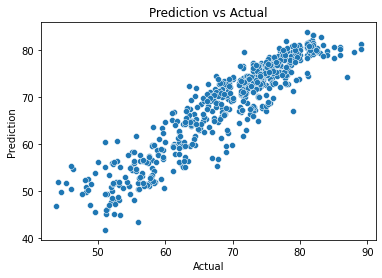

In [57]:
##Prediction vs Actual
sns.scatterplot(y_test,y_pred)
plt.title('Prediction vs Actual')
plt.xlabel('Actual')
plt.ylabel('Prediction')

F:\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Errors')

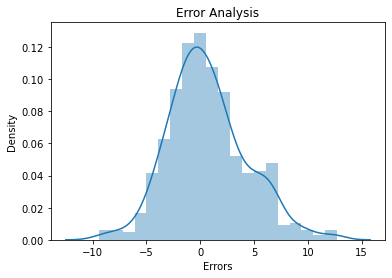

In [58]:
##errors
sns.distplot(y_test-y_pred,bins=20)
plt.title('Error Analysis')
plt.xlabel('Errors')

## Deployment

In [73]:
##We will deploy model_lm_3

In [74]:
filename = 'final_model.pickle'

In [75]:
# saving the model to the local file system
pickle.dump(model_lm_3, open(filename, 'wb'))

In [78]:
# prediction using the saved model
loaded_model = pickle.load(open(filename, 'rb'))
a=loaded_model.predict([[0.479,263,19.1,0.1]])
a[0]

64.8792891931399